In [1]:
import os, sys
os.environ['ON_PY']="1"
from params import parser
from common_utils import setup_seed
from data_utils import pack_data_from_config
import numpy as np
from test_script.base import Test
import matplotlib.pyplot as plt
import numpy as np

notebook_dir = os.getcwd()
print(notebook_dir)
# 将工作目录更改为上一级目录
os.chdir("/home/wlc/FJSP-DRL-main")



pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
/home/wlc/FJSP-DRL-main/plot_imgs


In [2]:
instances = [ "10x5+mix", "20x5x0+mix", "15x10x0+mix", "20x10x0+mix", ]
test_data_list = [ "10x5+mix", "20x5+mix", "15x10+mix", "20x10+mix",]


In [3]:


args = ["--test_data", *test_data_list,
        "--test_model", *instances]

extra_args = ["--network_type", "", "--model_source" , "SD2", "--data_source", "SD2"]

args = [*extra_args, *args]

print(args)


['--network_type', '', '--model_source', 'SD2', '--data_source', 'SD2', '--test_data', '10x5+mix', '20x5+mix', '15x10+mix', '20x10+mix', '--test_model', '10x5+mix', '20x5x0+mix', '15x10x0+mix', '20x10x0+mix']


In [4]:
# # DAN 解
# configs = parser.parse_args(args=args)

# setup_seed(configs.seed_test)

# test_model = []

# for model_name in configs.test_model:
#     test_model.append((f'./trained_network/{configs.model_source}/{model_name}.pth', model_name))
# print(test_model)
# test_data = pack_data_from_config(configs.data_source, configs.test_data)

# baseline_makespans = []
# for i in range(len(test_model)):
#     model = test_model[i]
#     data = test_data[i]
#     print("datta[1]: ",data[1])
#     print("-" * 25 + "Test Learned Model" + "-" * 25)
#     print(f"test data name: {data[1]}")
#     finetuning = True if model[1].startswith("maml") else False
#     print(f"Model name : {model[1]}")
#     result_5_times = []
#     for j in range(2):
#         test = Test(configs, data[0], model[0])     
#         result = test.greedy_strategy(finetuning=finetuning)
#         result_5_times.append(result)
#     result_5_times = np.array(result_5_times)

#     save_result = np.min(result_5_times, axis=0)
#     print("testing results:")
#     print(f"makespan(greedy): ", save_result[:, 0].mean())
#     baseline_makespans.append(save_result[:, 0].mean())
#     # print(f"time: ", save_result[:, 2].mean())
#     # print(f"Max fast_adapt cnt:", save_result[:, 2].max())
#     # print(f"Average fast_adapt time:", save_result[:, 3].mean())
#     print("="*100)

# baseline_makespans = np.array(baseline_makespans)
# print(baseline_makespans)


In [5]:

baseline_makespans = [444.4, 730.7, 598.4, 659.0]

In [6]:
# MAML finetuning
# 获取finetuning的每个过程

def VAE_finetuning_test(args):
    configs = parser.parse_args(args=args)
    # print(configs.hidden_dim_actor, configs.hidden_dim_critic)
    test_model = []
    for model_name in configs.test_model:
        test_model.append((f'./trained_network/{configs.model_source}/{model_name}.pth', model_name))
    print(test_model)

    model = test_model[0]

    test_data = pack_data_from_config(configs.data_source, configs.test_data)

    finetuning_results = []
    for data in test_data:
        ### 对每个实例
        print("datta[1]: ",data[1])
        print("-" * 25 + "Test Learned Model" + "-" * 25)
        print(f"test data name: {data[1]}")
        print(f"Model name : {model[1]}")
        test = Test(configs, data[0], model[0])
        finetuning_return = test.finetuning(times=5)
        
        finetuning_results.append(finetuning_return)

    return finetuning_results


In [7]:

model = "vari_vae_2024-12-09T10-12-35"
model = "vari_vae_2024-12-14T21-50-40"
model = "vari_vae_2025-03-04T17-21-29"
model = "vari_vae_2025-03-05T17-15-39"
# model = "vari_vae_SD2_2025-03-05T20-24-36"
# model = "vari_vae_SD2_2025-03-06T11-43-50"
args = [*extra_args, "--test_data", *test_data_list,  "--test_model", model, "--network_type", "VAE"  ]

vae_finetuing_result = VAE_finetuning_test(args)

vae_finetuning_makespans = [_["makespan"] for _ in vae_finetuing_result]
print(vae_finetuning_makespans)


[('./trained_network/SD2/vari_vae_2025-03-05T17-15-39.pth', 'vari_vae_2025-03-05T17-15-39')]
datta[1]:  10x5+mix
-------------------------Test Learned Model-------------------------
test data name: 10x5+mix
Model name : vari_vae_2025-03-05T17-15-39
datta[1]:  20x5+mix
-------------------------Test Learned Model-------------------------
test data name: 20x5+mix
Model name : vari_vae_2025-03-05T17-15-39
datta[1]:  15x10+mix
-------------------------Test Learned Model-------------------------
test data name: 15x10+mix
Model name : vari_vae_2025-03-05T17-15-39
datta[1]:  20x10+mix
-------------------------Test Learned Model-------------------------
test data name: 20x10+mix
Model name : vari_vae_2025-03-05T17-15-39
[[647.0, 369.0, 360.0, 369.0, 359.0], [1205.0, 695.0, 709.0, 675.0, 714.0], [1019.0, 563.0, 584.0, 639.0, 595.0], [1240.0, 625.0, 661.0, 625.0, 641.0]]


In [8]:
# pretrain finetuning

# args = [*ec_args, "--test_data", *test_data_list, 
#         # "--hidden_dim_actor", "512", "--hidden_dim_critic", "512",
#         "--test_model", "PreTrain"]

# pretrain_finetuning_makespans, pretrain_finetuning_ecs = VAE_finetuning_test(args)

pretrain_finetuning = [
    [778.0, 471.0, 492.0, 527.0, 456.0],
    [1225.0, 910.0, 960.0, 923.0, 946.0],
    [1290.0, 715.0, 719.0, 765.0, 652.0],
    [1556.0, 933.0, 1039.0, 1091.0, 990.0],
]


In [9]:
# random
import torch
from model.PPO import PPO_initialize

configs = parser.parse_args(args=args)
ppo = PPO_initialize(configs)

torch.save(ppo.policy.state_dict(), f'./trained_network/SD2/test_random_VAE.pth')

args = ["--test_data", *test_data_list, 
        "--test_model", "test_random_VAE", "--network_type", "VAE", "--model_source", "SD2", "--data_source", "SD2" ]

random_finetuning = VAE_finetuning_test(args)

random_finetuning = [_["makespan"] for _ in random_finetuning]
print( random_finetuning)

[('./trained_network/SD2/test_random_VAE.pth', 'test_random_VAE')]
datta[1]:  10x5+mix
-------------------------Test Learned Model-------------------------
test data name: 10x5+mix
Model name : test_random_VAE
datta[1]:  20x5+mix
-------------------------Test Learned Model-------------------------
test data name: 20x5+mix
Model name : test_random_VAE
datta[1]:  15x10+mix
-------------------------Test Learned Model-------------------------
test data name: 15x10+mix
Model name : test_random_VAE
datta[1]:  20x10+mix
-------------------------Test Learned Model-------------------------
test data name: 20x10+mix
Model name : test_random_VAE
[[647.0, 568.0, 739.0, 573.0, 697.0], [1205.0, 1159.0, 1105.0, 1236.0, 1125.0], [1019.0, 1050.0, 831.0, 886.0, 843.0], [1240.0, 1199.0, 1009.0, 1076.0, 1169.0]]


In [10]:
MAML_finetuning_makespan = [
    [660.0, 460.0, 468.0, 444.0, 430],
    [1151.0, 727.0, 724.0, 743.0, 767.0],
    [969.0, 703.0, 643.0, 654.0, 613.0],
    [1260.0, 784.0, 771.0, 777.0, 752.0],
]


In [11]:
# from plot_imgs.plt_utils import plot_funetuning
def plot_funetuning(data, title, y_label="Makespan", labels=None, label=True):
    # Labels for the lines
    if labels is None: labels = ["DAN_baseline", "MAML", "pre_training", "random"]
    x = range(1, len(data[0]) + 1)
    # Plotting the lines
    for i, row in enumerate(data):
        if label: plt.plot(x, row, label=labels[i], linewidth=0.5)
        else: plt.plot(x, row, linewidth=0.5)
        plt.scatter(x, row, s=10)  # s 参数控制点的大小
    plt.xlabel("Finetuning Epoch") 
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

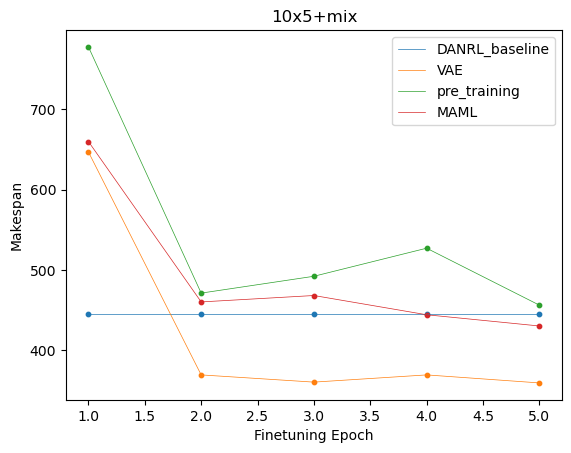

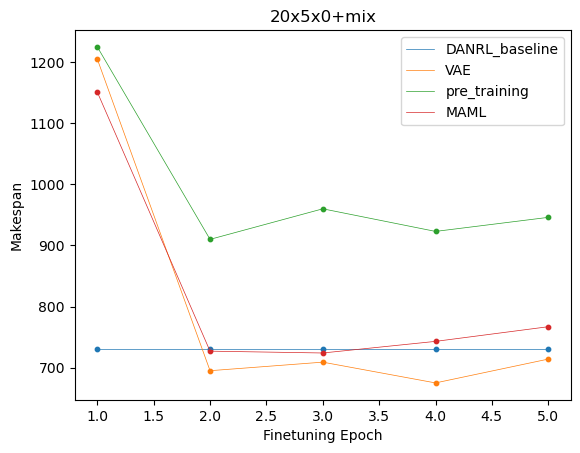

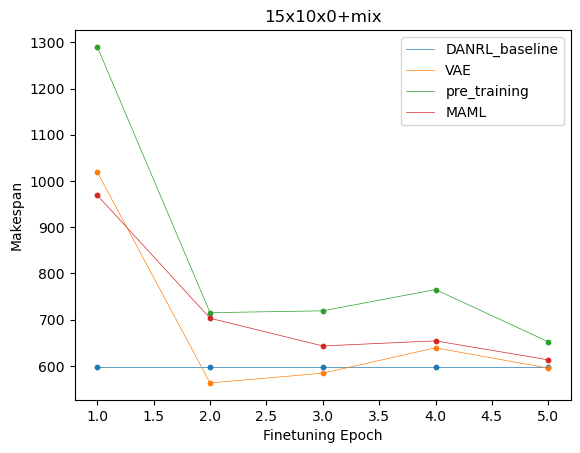

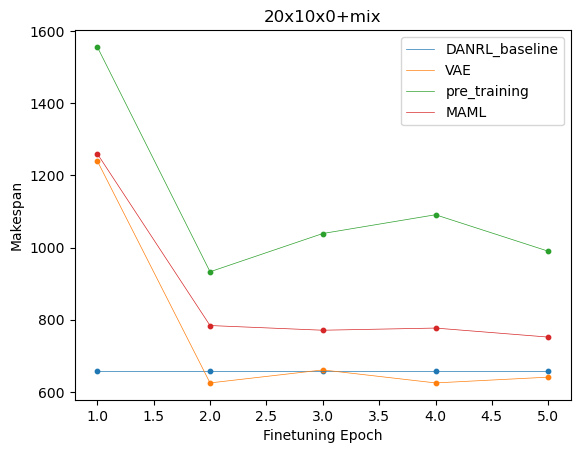

In [12]:

for idx, key in enumerate(instances):
    # plot_dict[key][0] = [baseline_makespans[idx]  for _ in range(configs.adapt_nums)]
    # plot_dict[key][0] = np.full(5, baseline_EC[idx])
    # plot_dict[key][1] = maml_finetuning_ecs[idx]
    # plot_dict[key][2] = pretrain_finetuning_ecs[idx]
    # plot_dict[key][3] = random_finetuning_ecs[idx]
    # # plot_makespan_fill(
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].mean(axis=0), pretrain_finetuning_ecs[idx].mean(axis=0), random_finetuning_ecs[idx].mean(axis=0)],
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].max(axis=0), pretrain_finetuning_ecs[idx].max(axis=0), random_finetuning_ecs[idx].max(axis=0)],
    #     [np.full(5, baseline_EC[idx]), maml_finetuning_ecs[idx].min(axis=0), pretrain_finetuning_ecs[idx].min(axis=0), random_finetuning_ecs[idx].min(axis=0)],
    #     key,
    # )
    plot_funetuning([np.full(5, baseline_makespans[idx]), vae_finetuning_makespans[idx], pretrain_finetuning[idx], MAML_finetuning_makespan[idx]], key, y_label="Makespan", labels = ["DANRL_baseline", "VAE", "pre_training", "MAML"])



In [13]:
print("VAE = ", vae_finetuning_makespans, "\npre_train = ", pretrain_finetuning, "\nmaml = ", MAML_finetuning_makespan)

VAE =  [[647.0, 369.0, 360.0, 369.0, 359.0], [1205.0, 695.0, 709.0, 675.0, 714.0], [1019.0, 563.0, 584.0, 639.0, 595.0], [1240.0, 625.0, 661.0, 625.0, 641.0]] 
pre_train =  [[778.0, 471.0, 492.0, 527.0, 456.0], [1225.0, 910.0, 960.0, 923.0, 946.0], [1290.0, 715.0, 719.0, 765.0, 652.0], [1556.0, 933.0, 1039.0, 1091.0, 990.0]] 
maml =  [[660.0, 460.0, 468.0, 444.0, 430], [1151.0, 727.0, 724.0, 743.0, 767.0], [969.0, 703.0, 643.0, 654.0, 613.0], [1260.0, 784.0, 771.0, 777.0, 752.0]]
